C:\Users\gif\AppData\Local\Temp\ipykernel_12040\3808025103.py:39: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0, 256], color='black')
C:\Users\gif\AppData\Local\Temp\ipykernel_12040\3808025103.py:43: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_equalized.ravel(), 256, [0, 256], color='black')


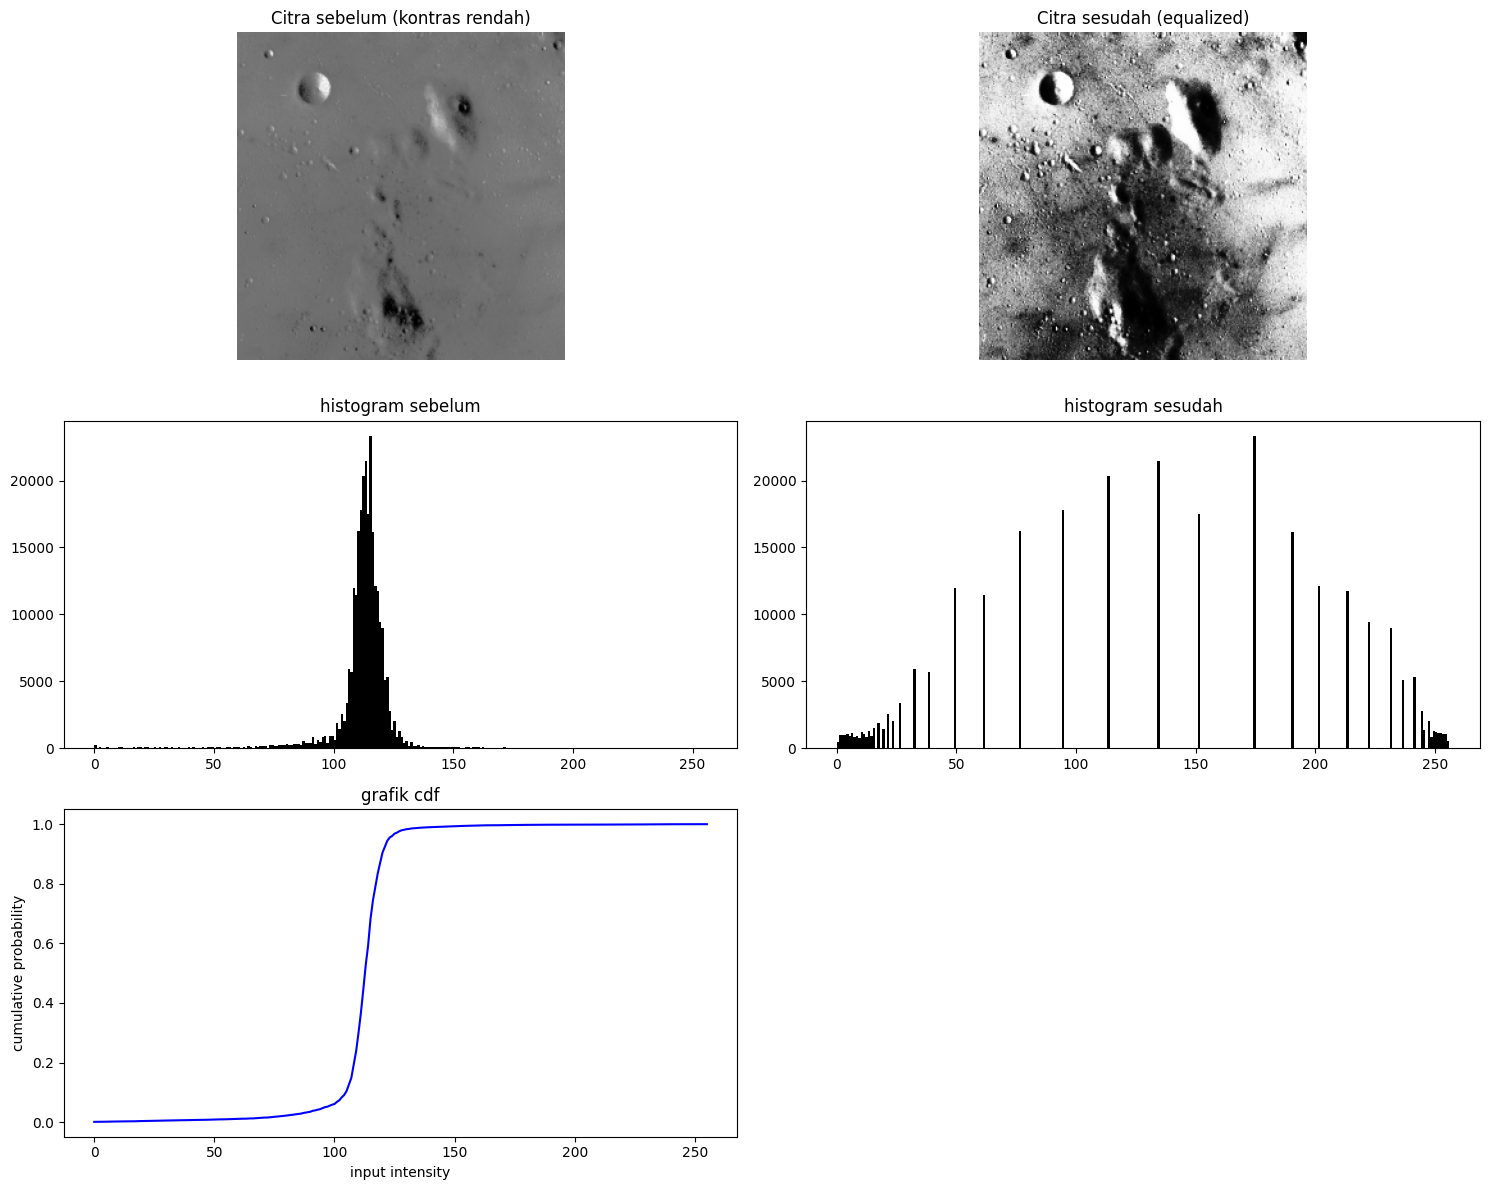

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from skimage import data

# 1. persiapan data
img = data.moon()
h, w = img.shape

# 1. hitung histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# 2. hitung cdf
cdf = hist.cumsum()

# normalisasi cdf
cdf_normalized = cdf / cdf.max()

# 3. mapping
# s = round(255 * cdf)
mapping_table = np.round(cdf_normalized * 255).astype('uint8')

# 4. pemetaan ke citra asli
img_equalized = mapping_table[img]

plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Citra sebelum (kontras rendah)")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(img_equalized, cmap='gray')
plt.title("Citra sesudah (equalized)")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.hist(img.ravel(), 256, [0, 256], color='black')
plt.title("histogram sebelum")

plt.subplot(3, 2, 4)
plt.hist(img_equalized.ravel(), 256, [0, 256], color='black')
plt.title("histogram sesudah")

# tampilkan grafik cdf

plt.subplot(3, 2, 5)
plt.plot(cdf_normalized, color='blue')
plt.title("grafik cdf")
plt.xlabel("input intensity")
plt.ylabel("cumulative probability")

plt.tight_layout()
plt.show()

C:\Users\gif\AppData\Local\Temp\ipykernel_12040\1050574520.py:52: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(orig.ravel(), 256, [0, 256], color='gray')
C:\Users\gif\AppData\Local\Temp\ipykernel_12040\1050574520.py:64: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equ.ravel(), 256, [0, 256], color='blue')


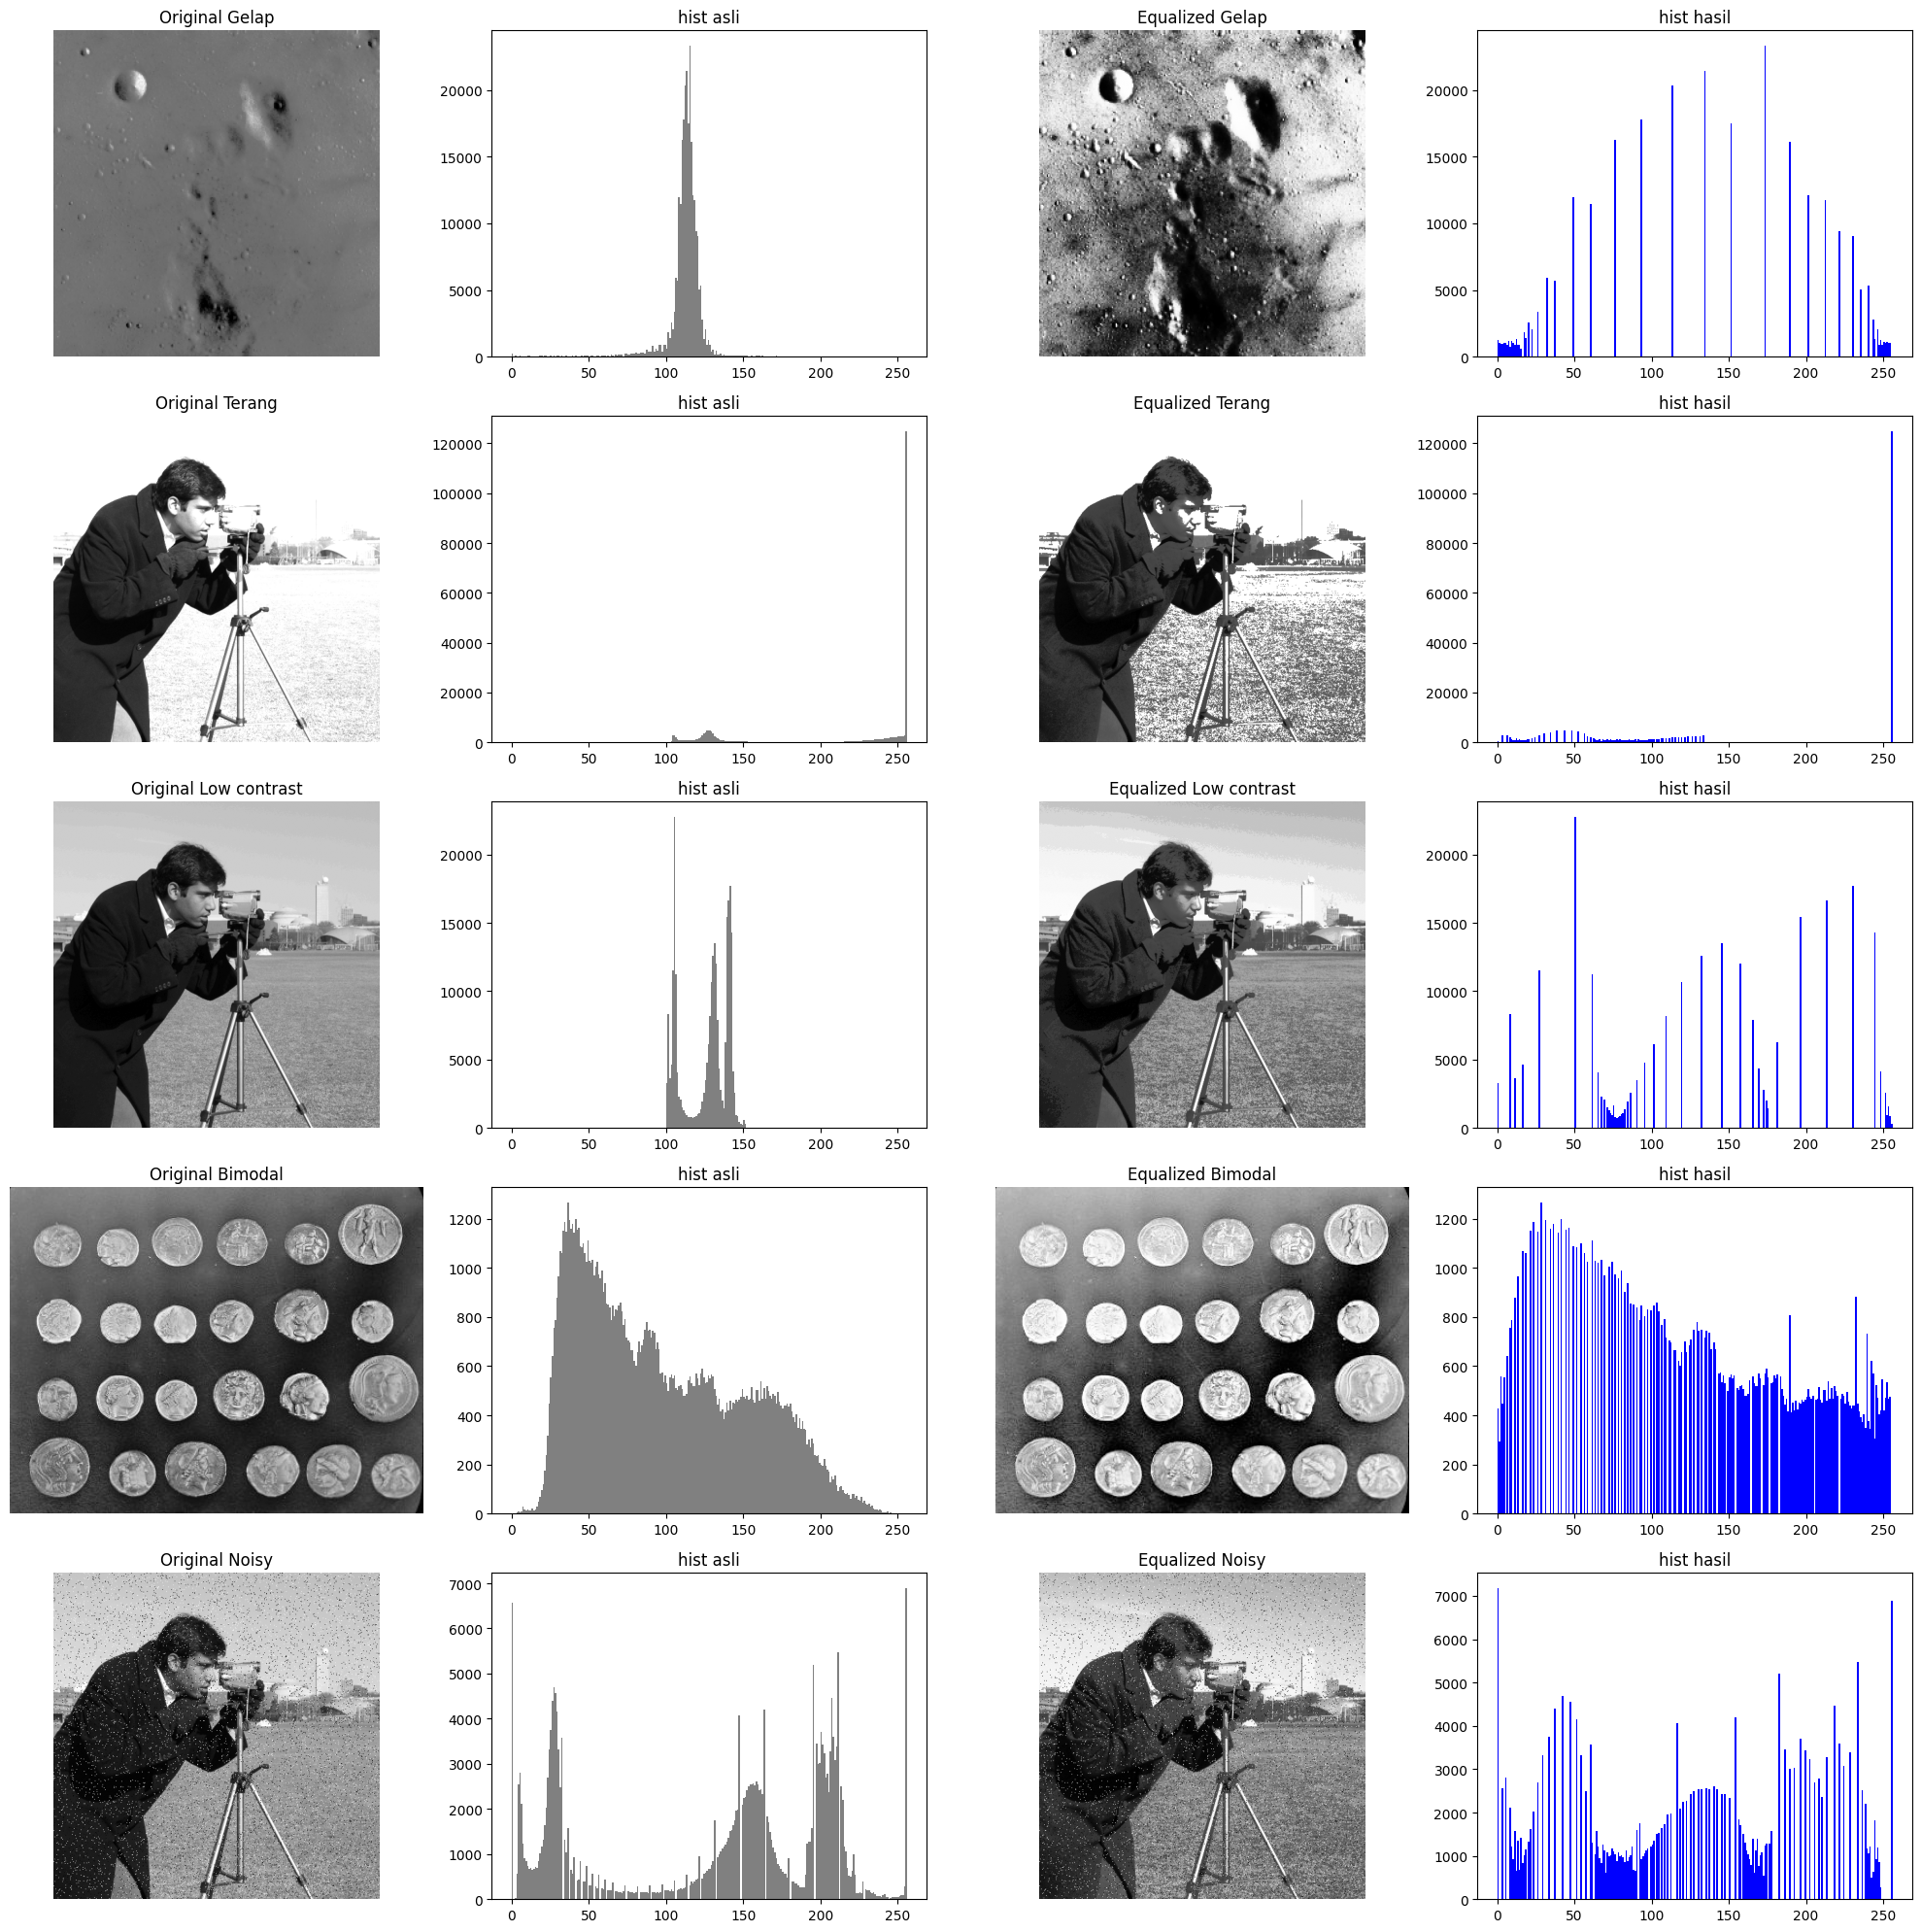

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, color

# 1. siapkan 5 pasien
# a. gelap (underexposed)

img_gelap = data.moon()


# b. terang (overexposed)
img_terang = np.clip(data.camera().astype(np.int16) + 100, 0, 255).astype(np.uint8)

# c. kontras rendah 
img_low_con = np.clip((data.camera() * 0.2) + 100, 0, 255).astype(np.uint8)

# d. bimodal
img_bimodal = data.coins()

# e. noisy
img_noisy = util.random_noise(data.camera(), mode = 's&p', amount = 0.05)
img_noisy = (img_noisy * 255).astype(np.uint8)

test_cases = [img_gelap, img_terang, img_low_con, img_bimodal, img_noisy]
case_names = ['Gelap', 'Terang', 'Low contrast', 'Bimodal', 'Noisy']

# fungsi histogram equalization manual
def manual_equalization(img):
    hist, _ = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0) # masking 0
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    return cdf[img]


# visualisasi
plt.figure(figsize=(20,20))
for i in range(5):
    orig = test_cases[i]
    equ = manual_equalization(orig)
    
    # baris 1: citra asli
    plt.subplot(5, 4, i*4 + 1)
    plt.imshow(orig, cmap='gray')
    plt.title(f"Original {case_names[i]}")
    plt.axis('off')
    
    # histogram asli
    plt.subplot(5, 4, i*4 + 2)
    plt.hist(orig.ravel(), 256, [0, 256], color='gray')
    plt.title("hist asli")
    
    # hasil
    plt.subplot(5, 4, i*4 + 3)
    plt.imshow(equ, cmap='gray')
    plt.title(f"Equalized {case_names[i]}")
    
    plt.axis('off')
    
    # histogram hasil
    plt.subplot(5, 4, i*4 + 4)
    plt.hist(equ.ravel(), 256, [0, 256], color='blue')
    plt.title("hist hasil")
    
plt.tight_layout()
plt.show()

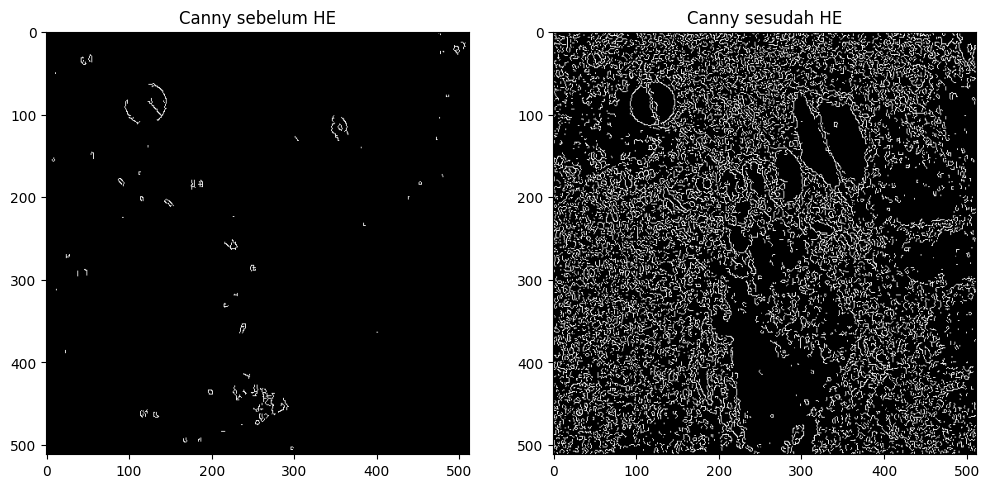

In [5]:
# edge detection
img1 = data.moon()
img1_equ = manual_equalization(img1)

# deteksi tepi canny (seb dan sed)
edge_before = cv2.Canny(img1, 100, 200)
edge_after = cv2.Canny(img1_equ, 100, 200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plt.imshow(edge_before, cmap='gray'); plt.title("Canny sebelum HE")
plt.subplot(1, 2, 2); plt.imshow(edge_after, cmap='gray'); plt.title("Canny sesudah HE")
plt.show()


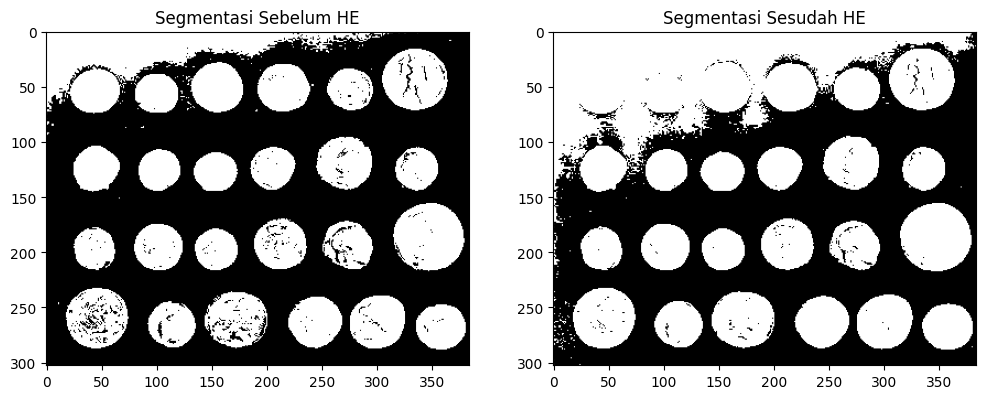

In [9]:
# --- STUDI KASUS 3: SEGMENTATION ---
img3 = data.coins()
img3_equ = manual_equalization(img3)

# Otsu Thresholding (mencari ambang batas otomatis)
_, thresh_before = cv2.threshold(img3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, thresh_after = cv2.threshold(img3_equ, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plt.imshow(thresh_before, cmap='gray'); plt.title("Segmentasi Sebelum HE")
plt.subplot(1, 2, 2); plt.imshow(thresh_after, cmap='gray'); plt.title("Segmentasi Sesudah HE")
plt.show()